# Matching

date: 09.09.2023


### Setup 
activate `firing rate` environment

In [ ]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns 

proj_path = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"
os.chdir(proj_path)

from src.nodes.postpro.cell_matching import get_SpikeInterface_matching_object
from src.nodes.utils import get_config
from src.nodes.postpro.npx_cell_types import get_interneurons, get_pyramidal

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_08_17"

# GET RUN CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# set Kilosort sorted spikes and cells path
KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]

# set ground truth spikes and cells path
GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# match file save path
MATCH_FILE = data_conf["sorting"]["sorters"]["kilosort3"]["match_with_cell_type"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-09-04 12:17:23,601 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-04 12:17:23,620 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [17]:
# are the sorted units overmerged (have non zero agreement scores with other true units)
# get matching object
MatchingObject = get_SpikeInterface_matching_object(GT_SORTING_PATH, KS3_SORTING_PATH)

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


In [19]:
# get agreement scores for all
matching = MatchingObject.agreement_scores.T

# sort each row such that the row with the highest score be first, column order stays untouched
argmax = matching.T.idxmax().to_frame()
max = matching.T.max()
descending_ix = np.argsort(max)[::-1]
matching_sorted = matching.iloc[descending_ix]

# repeat for columns, row order stays untouched
argmax = matching_sorted.idxmax().to_frame()
max = matching_sorted.max()
descending_ix = np.argsort(max)[::-1]
matching_sorted = matching_sorted.iloc[:, descending_ix]
matching_sorted

,241679,3750937,1353447,1428671,739303,3672749,2845929,460645,3891529,3810046,...,464961,1832915,4181012,3767436,889068,1928283,4189686,431499,1848102,3801256
298,1.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.0,0.78125,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.0,0.00000,0.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.00000,0.000000,0.618644,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.0,0.00000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


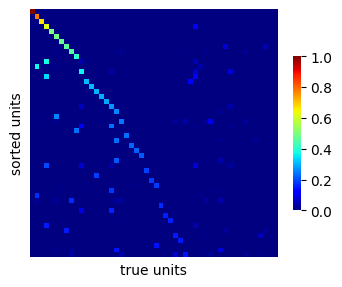

In [20]:
# plot (50 first true and ground truth units)
mx_to_plot = matching_sorted.iloc[:50,:50].values
fig, axis = plt.subplots(figsize=(4,4))
ax = sns.heatmap(mx_to_plot, cmap="jet", cbar_kws={"shrink": 0.5}, yticklabels=False, xticklabels=False);

# legend
plt.xlabel("true units");
plt.ylabel("sorted units");
ax.set_aspect("equal")
# plt.savefig("figures/matching_heatmap.pdf")

## Match units

For each true unit, its sorted unit is the unit with the highest agreement score with the true unit.

We drop the redundant sorted units, associated with many ground truth with different cell types as a cell type can not be assigned to them.

We keep all other sorted units, including those matched with scores below chance (10%), because in-vivo, w/o ground truth information, they could be kept.

In [174]:
# get best matching pair
matched = matching_sorted.idxmax().to_frame()
matched = matched.sort_index()

In [108]:
# get ground truth cell types
pyr_neurons = get_pyramidal(data_conf)
parv_neurons = get_interneurons(data_conf,'LBC|NBC')
sst_neurons = get_interneurons(data_conf,'MC')
vip_neurons = get_interneurons(data_conf,'SBC')

2023-09-04 11:18:52,889 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-04 11:18:52,944 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.1


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-04 11:19:40,759 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-04 11:19:40,775 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-04 11:20:13,008 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-04 11:20:13,018 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


2023-09-04 11:20:42,459 - root - ground_truth.py - load - INFO - loading already processed ground truth SortingExtractor ...
2023-09-04 11:20:42,472 - root - ground_truth.py - load - INFO - loading already processed true sorting - done in 0.0


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


In [109]:
# unit-test (populations should be distinct)
assert len(set(pyr_neurons) - set(parv_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(pyr_neurons) - set(sst_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(pyr_neurons) - set(vip_neurons)) == len(set(pyr_neurons)), "the two populations should be separate"
assert len(set(parv_neurons) - set(sst_neurons)) == len(set(parv_neurons)), "the two populations should be separate"
assert len(set(parv_neurons) - set(vip_neurons)) == len(set(parv_neurons)), "the two populations should be separate"
assert len(set(sst_neurons) - set(vip_neurons)) == len(set(sst_neurons)), "the two populations should be separate"

In [175]:
# map cell types to ground truths and matched sorted units
matched.loc[pyr_neurons, "cell_type"] = "pyr"
matched.loc[parv_neurons, "cell_type"] = "parv"
matched.loc[sst_neurons, "cell_type"] = "sst"
matched.loc[vip_neurons, "cell_type"] = "vip"

# tag others as interneurons
matched["cell_type"][matched["cell_type"].isna()] ="intern"
len(matched)

/tmp/ipykernel_8974/3483055713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["cell_type"][matched["cell_type"].isna()] ="intern"


1353

In [214]:
# drop sorted units that match many ground truths ("redundant") with different cell types
matched_sorted_units = np.unique(matched[0].values)

matched["to_drop"] = 0

for ix in range(len(matched_sorted_units)):

    # case sorted unit matches many ground truths
    if sum(matched[0] == matched_sorted_units[ix])>1:
        
        # find redundant sorted unit
        loc = np.where(matched[0] == matched_sorted_units[ix])[0]
        
        # flag to drop if they have different cell types
        if len(np.unique(matched["cell_type"].iloc[loc])) > 1:
            matched["to_drop"].iloc[loc] = 1
        else:
            matched["to_drop"].iloc[loc] = 0

# drop redundant with different cell types
matched = matched[matched["to_drop"]==0]
matched = matched.drop(columns=["to_drop"])
matched

/tmp/ipykernel_8974/3529470941.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched["to_drop"].iloc[loc] = 0


,0,cell_type
12165,251,pyr
16652,325,pyr
21040,96,pyr
24768,315,pyr
29248,18,pyr
...,...,...
4201515,192,pyr
4201970,201,pyr
4204865,235,pyr
4209594,115,pyr


In [199]:
# unit-test (all redundant units' cell types are unique)
for ix in range(len(matched_sorted_units)):
    assert len(np.unique(matched["cell_type"][matched[0]==matched_sorted_units[ix]]))<2, "error"

In [207]:
# get accuracy scores
score = []
for ix in range(matched.shape[0]):
    score.append(matching_sorted.loc[matched[0].values[ix], matched.index[ix]])
score = np.array(score)

In [220]:
# add scores
matched["accuracy"] = score
matched.sort_values(by="accuracy", ascending=False)

,0,cell_type,accuracy
3750937,258,pyr,0.781250
1353447,188,pyr,0.666667
1428671,117,pyr,0.618644
3672749,279,pyr,0.485437
460645,333,pyr,0.461538
...,...,...,...
3559827,142,pyr,0.000186
325272,142,pyr,0.000186
3529279,142,pyr,0.000186
927446,142,pyr,0.000186


In [246]:
# save match file
parent_path = os.path.dirname(MATCH_FILE)
if not os.path.isdir(parent_path):
    os.makedirs(parent_path)
matched.insert(0, "ground truth", matched.index)
matched = matched.rename(columns={0:"sorted"})
matched.to_csv(MATCH_FILE, index=False)
# matched = matched.drop(columns=["ground truth"])